In [55]:
import pandas as pd
import maidenhead as mh
import time

#### Quick load and format to study radio propagation with Weak Signal Propagation Reporter (WSPR) data 

## 1- Load WSPR data:
Source: https://www.wsprnet.org/drupal/downloads

In [15]:
# wspr = pd.read_csv('wsprspots-2022-04.csv',nrows=1000)
wspr = pd.read_csv('wsprspots-2022-04.csv')

In [16]:
wspr.head()

,4087922345,1648771320,GM1OXB,IO87lp,-14,3.570019,DK8JP,JO31gk,30,0,925,322,3,Unnamed: 13,1
0,4087922308,1648771320,GM1OXB,IO87lp,-16,3.570093,DL4XJ,JO42un,30,0,986,310,3,NaN,1
1,4087922353,1648771320,GM1OXB,IO87lp,-12,3.570014,G4GCI,IO90gu,37,0,762,353,3,NaN,1
2,4087922296,1648771320,GM1OXB,IO87lp,4,3.570130,G6GN,IO81rm,30,0,682,357,3,NaN,1
3,4087922326,1648771320,GM1OXB,IO87lp,-10,3.570060,G8ORM,IO93cu,30,0,429,350,3,NaN,1
4,4087922341,1648771320,GM1OXB,IO87lp,-27,3.570046,G8ZGK,IO91,20,0,698,350,3,NaN,1


## 2- Format

In [25]:
#ADD COL NAMES
wspr.columns = ['SPOT_ID','DATE','RX_CALLSIGN','RX_GRID','SNR','FREQUENCY','TX_CALLSIGN','TX_GRID','POWER','DRIFT','DISTANCE','AZIMUTH','BAND','VERSION','CODE']

In [36]:
#CONVERT Date UNIX TO UTC
wspr['DATE'] = pd.to_datetime(wspr['DATE'],unit='s')

In [47]:
#CONVER GRID TO LAT/LONG
print('Starting GRID conversion to LAT/LON')

#RX_GRID
print('Start TX GRID conversion to LAT')
wspr['TX_LAT'] = wspr['TX_GRID'].apply(lambda x: (mh.to_location(x)[0]))
print('Start TX GRID conversion to LON')
wspr['TX_LON'] = wspr['TX_GRID'].apply(lambda x: (mh.to_location(x)[1]))

#TX_GRID
print('Start RX GRID conversion to LAT')
wspr['RX_LAT'] = wspr['RX_GRID'].apply(lambda x: (mh.to_location(x)[0]))
print('Start RX GRID conversion to LON')
wspr['RX_LON'] = wspr['RX_GRID'].apply(lambda x: (mh.to_location(x)[1]))

print('Finish GRID conversion to LAT/LON')


Starting GRID conversion to LAT/LON
Start TX GRID conversion to LAT
Start TX GRID conversion to LON
Start RX GRID conversion to LAT
Start RX GRID conversion to LON
Finish GRID conversion to LAT/LON


In [187]:
wspr.head()

,SPOT_ID,DATE,RX_CALLSIGN,RX_GRID,SNR,FREQUENCY,TX_CALLSIGN,TX_GRID,POWER,DRIFT,DISTANCE,AZIMUTH,BAND,VERSION,CODE,TX_LAT,TX_LON,RX_LAT,RX_LON
0,4087922308,2022-04-01 00:02:00,GM1OXB,IO87lp,-16,3.570093,DL4XJ,JO42un,30,0,986,310,3,NaN,1,52.541667,9.666667,57.625,-3.083333
1,4087922353,2022-04-01 00:02:00,GM1OXB,IO87lp,-12,3.570014,G4GCI,IO90gu,37,0,762,353,3,NaN,1,50.833333,-1.500000,57.625,-3.083333
2,4087922296,2022-04-01 00:02:00,GM1OXB,IO87lp,4,3.570130,G6GN,IO81rm,30,0,682,357,3,NaN,1,51.500000,-2.583333,57.625,-3.083333
3,4087922326,2022-04-01 00:02:00,GM1OXB,IO87lp,-10,3.570060,G8ORM,IO93cu,30,0,429,350,3,NaN,1,53.833333,-1.833333,57.625,-3.083333
4,4087922341,2022-04-01 00:02:00,GM1OXB,IO87lp,-27,3.570046,G8ZGK,IO91,20,0,698,350,3,NaN,1,51.000000,-2.000000,57.625,-3.083333


## 3- Filters

In [253]:
equal = False #if false filter RX_CALLSIGN and TX_CALLSIGN with contains, if true must be equal (quicklier)
rx_callsign = 'GM1OXB'  #Callsign (or part of callsign) or ALL
tx_callsign = 'HG7RED' #Callsign (or part of callsign) or ALL
band = int('3')  #Band or ALL

date_floor = pd.Timestamp('2022-04-01')
date_upper = pd.Timestamp('2022-04-20')

In [254]:
wspr_filtered = wspr

if not band == 'ALL':
    wspr_filtered = wspr_filtered[wspr_filtered['BAND'] == band]

wspr_filtered = wspr_filtered[(wspr_filtered['DATE'] >= date_floor) & (wspr_filtered['DATE'] < date_upper)]

if not tx_callsign == 'ALL':
    if equal:
        wspr_filtered = wspr_filtered[wspr_filtered['TX_CALLSIGN']==tx_callsign] 
    else: 
        wspr_filtered = wspr_filtered[wspr_filtered['TX_CALLSIGN'].str.contains(tx_callsign)]     
if not rx_callsign == 'ALL':
    if equal:
        wspr_filtered = wspr_filtered[wspr_filtered['RX_CALLSIGN']==rx_callsign]
    else:
        wspr_filtered = wspr_filtered[wspr_filtered['RX_CALLSIGN'].str.contains(rx_callsign)]               

In [255]:
wspr_filtered.head()

,SPOT_ID,DATE,RX_CALLSIGN,RX_GRID,SNR,FREQUENCY,TX_CALLSIGN,TX_GRID,POWER,DRIFT,DISTANCE,AZIMUTH,BAND,VERSION,CODE,TX_LAT,TX_LON,RX_LAT,RX_LON
5901230,4098538687,2022-04-02 22:02:00,GM1OXB,IO87lp,-22,3.570072,HG7RED,JN97kj,23,0,1856,316,3,NaN,1,47.375,18.833333,57.625,-3.083333
6485283,4098533830,2022-04-03 02:14:00,GM1OXB,IO87lp,-25,3.570158,HG7RED,JN97kj,23,0,1856,316,3,NaN,1,47.375,18.833333,57.625,-3.083333
9398118,4098474186,2022-04-03 19:36:00,GM1OXB,IO87lp,-25,3.570108,HG7RED,JN97kj,23,0,1856,316,3,NaN,1,47.375,18.833333,57.625,-3.083333
10260843,4098464359,2022-04-03 23:58:00,GM1OXB,IO87lp,-21,3.570115,HG7RED,JN97kj,23,0,1856,316,3,NaN,1,47.375,18.833333,57.625,-3.083333
13262459,4103602439,2022-04-04 18:38:00,GM1OXB,IO87lp,-24,3.570110,HG7RED,JN97kj,23,0,1856,316,3,NaN,1,47.375,18.833333,57.625,-3.083333


## 4- ORDER

In [252]:
wspr_filtered.sort_values(['DISTANCE'],ascending=False).head(50)

,SPOT_ID,DATE,RX_CALLSIGN,RX_GRID,SNR,FREQUENCY,TX_CALLSIGN,TX_GRID,POWER,DRIFT,DISTANCE,AZIMUTH,BAND,VERSION,CODE,TX_LAT,TX_LON,RX_LAT,RX_LON
18678437,4119432173,2022-04-06 02:22:00,GM1OXB,IO87lp,-21,3.570193,K3RWR,FM18qi,37,0,5560,42,3,NaN,1,38.333333,-76.666667,57.625,-3.083333
19092024,4119427555,2022-04-06 05:02:00,GM1OXB,IO87lp,-20,3.570194,K3RWR,FM18qi,37,0,5560,42,3,NaN,1,38.333333,-76.666667,57.625,-3.083333
19041361,4119428283,2022-04-06 04:42:00,GM1OXB,IO87lp,-20,3.570194,K3RWR,FM18qi,37,0,5560,42,3,NaN,1,38.333333,-76.666667,57.625,-3.083333
18768859,4119431843,2022-04-06 02:54:00,GM1OXB,IO87lp,-20,3.570194,K3RWR,FM18qi,37,0,5560,42,3,NaN,1,38.333333,-76.666667,57.625,-3.083333
18993060,4119429125,2022-04-06 04:22:00,GM1OXB,IO87lp,-20,3.570194,K3RWR,FM18qi,37,0,5560,42,3,NaN,1,38.333333,-76.666667,57.625,-3.083333
18965491,4119429729,2022-04-06 04:10:00,GM1OXB,IO87lp,-18,3.570194,K3RWR,FM18qi,37,0,5560,42,3,NaN,1,38.333333,-76.666667,57.625,-3.083333
18844113,4119431366,2022-04-06 03:22:00,GM1OXB,IO87lp,-23,3.570194,K3RWR,FM18qi,37,0,5560,42,3,NaN,1,38.333333,-76.666667,57.625,-3.083333
802611,4090830919,2022-04-01 06:02:00,GM1OXB,IO87lp,-30,3.570023,WA1RAJ,FN42dt,37,0,4915,46,3,NaN,1,42.791667,-71.750000,57.625,-3.083333
31441847,4119247265,2022-04-09 04:02:00,GM1OXB,IO87lp,-21,3.570023,WA1RAJ,FN42dt,37,0,4915,46,3,NaN,1,42.791667,-71.750000,57.625,-3.083333
31693771,4119245480,2022-04-09 05:42:00,GM1OXB,IO87lp,-26,3.570047,N4SRN,FN42,23,0,4902,45,3,NaN,1,42.000000,-72.000000,57.625,-3.083333


## 5- PLOT SNR by DATE

In [192]:
import matplotlib.pyplot as plt

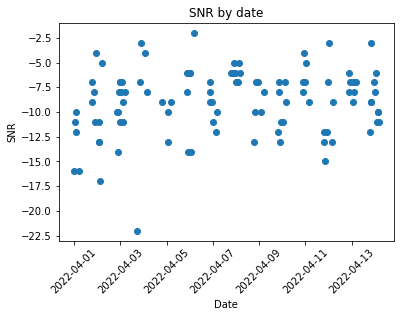

In [206]:
wspr_filtered_986 = wspr_filtered.copy()
plt.plot(wspr_filtered_986['DATE'], wspr_filtered_986['SNR'],'o')
plt.xticks(rotation=45)
plt.title('SNR by date')
plt.xlabel('Date')
plt.ylabel('SNR')
plt.show()

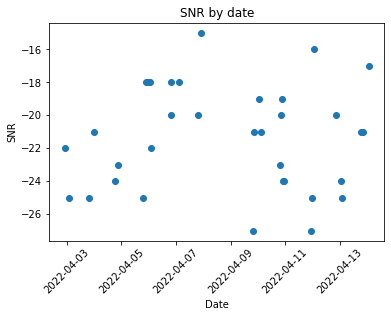

In [257]:
wspr_filtered_1856 = wspr_filtered.copy()
plt.plot(wspr_filtered_1856['DATE'], wspr_filtered_1856['SNR'],'o')
plt.xticks(rotation=45)
plt.title('SNR by date')
plt.xlabel('Date')
plt.ylabel('SNR')
plt.show()

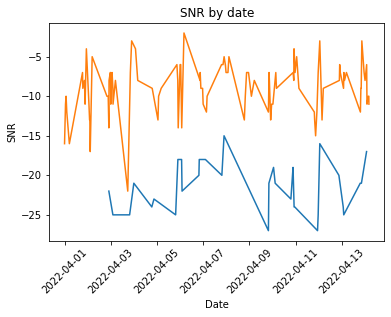

In [259]:
wspr_filtered_1856 = wspr_filtered.copy()
plt.plot(wspr_filtered['DATE'], wspr_filtered['SNR'],'-')
plt.plot(wspr_filtered_986['DATE'], wspr_filtered_986['SNR'],'-')

plt.xticks(rotation=45)
plt.title('SNR by date')
plt.xlabel('Date')
plt.ylabel('SNR')
plt.show()